   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

<ipython-input-18-1ac0f4eb7872>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Remplacez les NaN par 0


Polynomial Model RMSE: 37904.42285723087
Polynomial Model R^2: 0.8207999148217009
Lasso Model RMSE: 44534.258036231244
Ridge Model RMSE: 44534.280812044744
Comparaison des modèles :
         Model          RMSE      R^2
0      Linear  44534.256298  0.75263
1  Polynomial  37904.422857  0.82080
2       Lasso  44534.258036  0.75263
3       Ridge  44534.280812  0.75263


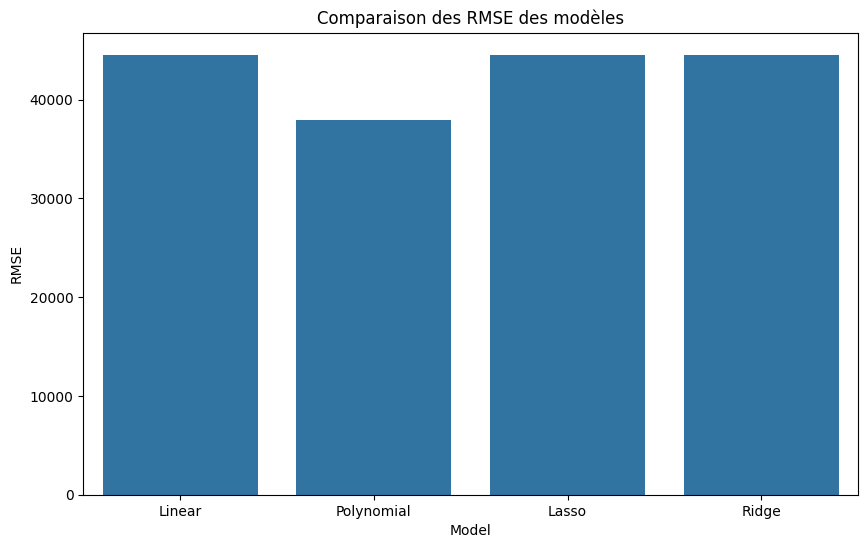

In [18]:
# Importer les bibliothèques nécessaires
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Télécharger la dernière version du dataset
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")
data = pd.read_csv(path + "/AmesHousing.csv")

# Afficher les premières lignes du DataFrame
print(data.head())

# Vérifier les valeurs manquantes
missing_data = data.isnull().sum().sort_values(ascending=False)
print("Valeurs manquantes :\n", missing_data[missing_data > 0])

# Traiter les valeurs manquantes (exemples)
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())
data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('None')
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
data['Bsmt Qual'] = data['Bsmt Qual'].fillna('No Basement')
data['Garage Type'] = data['Garage Type'].fillna('No Garage')

# Assurez-vous qu'il n'y a plus de valeurs manquantes dans les colonnes sélectionnées
features = ['Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Garage Cars']
X = data[features]
y = data['SalePrice']

# Vérifiez à nouveau les valeurs manquantes
print("Valeurs manquantes dans les caractéristiques :\n", X.isnull().sum())

# Si des NaN sont trouvés, soit les remplir, soit les supprimer
X.fillna(0, inplace=True)  # Remplacez les NaN par 0
# ou
# X.dropna(inplace=True)  # Supprimez les lignes contenant des NaN

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire simple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = linear_model.predict(X_test)
print("Linear Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Model R^2:", r2_score(y_test, y_pred))

# Régression polynomiale
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Diviser à nouveau pour la régression polynomiale
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Modèle de régression polynomiale
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Prédictions et évaluation
y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("Polynomial Model R^2:", r2_score(y_test, y_pred_poly))

# Modèle Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Modèle Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Évaluation
print("Lasso Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Ridge Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Comparaison des modèles
results = {
    'Model': ['Linear', 'Polynomial', 'Lasso', 'Ridge'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ],
    'R^2': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ]
}

results_df = pd.DataFrame(results)
print("Comparaison des modèles :\n", results_df)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Comparaison des RMSE des modèles')
plt.show()
